In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
print(xtrain.shape)

(60000, 28, 28)


In [3]:
unique,counts=np.unique(ytrain,return_counts=True)
unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
counts

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64)

In [5]:
print('train_label',dict(zip(unique,counts)))

train_label {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [6]:
indexes=np.random.randint(0,60000,size=25)
indexes

array([49292, 48865,  1502, 28500, 45780, 56476, 11578, 50588, 14487,
         453, 40866, 51105,  2454, 15071,  4253, 53451, 29094, 48524,
       46613, 43142, 41712, 57999, 18480, 36882, 12900])

In [7]:
images=xtrain[indexes]
labels=ytrain[indexes]

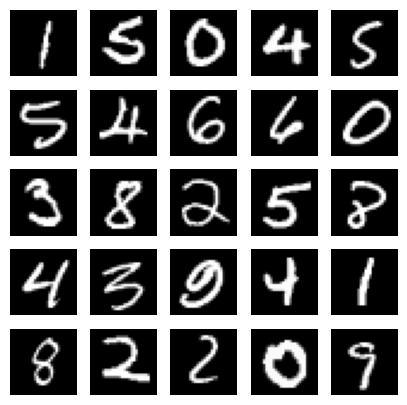

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5,5,i+1)
    image=images[i]
    plt.imshow(image,cmap='gray')
    plt.axis('off')
plt.show()
plt.savefig('mnist_sample.png')

In [9]:
numlabels=len(np.unique(ytrain))
numlabels

10

In [10]:
from keras.utils import to_categorical
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

In [11]:
ytrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [12]:
image_size=xtrain.shape[1]
image_size

28

In [13]:
input_size=image_size*image_size
input_size

784

In [14]:
xtrain.shape

(60000, 28, 28)

In [15]:
xtest.shape

(10000, 28, 28)

In [16]:
xtrain=np.reshape(xtrain,[60000,input_size])
xtrain=xtrain.astype('float32')/255
xtest=np.reshape(xtest,[10000,input_size])
xtest=xtest.astype('float32')/255

In [17]:
xtrain.shape

(60000, 784)

In [18]:
xtest.shape

(10000, 784)

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

In [20]:
batch_size=128
hidden_units=256
dropout=0.45

In [21]:
model=Sequential()
model.add(Dense(hidden_units,input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(numlabels))
model.add(Activation('softmax'))
model.summary()

C:\Users\archa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# pip install pydot

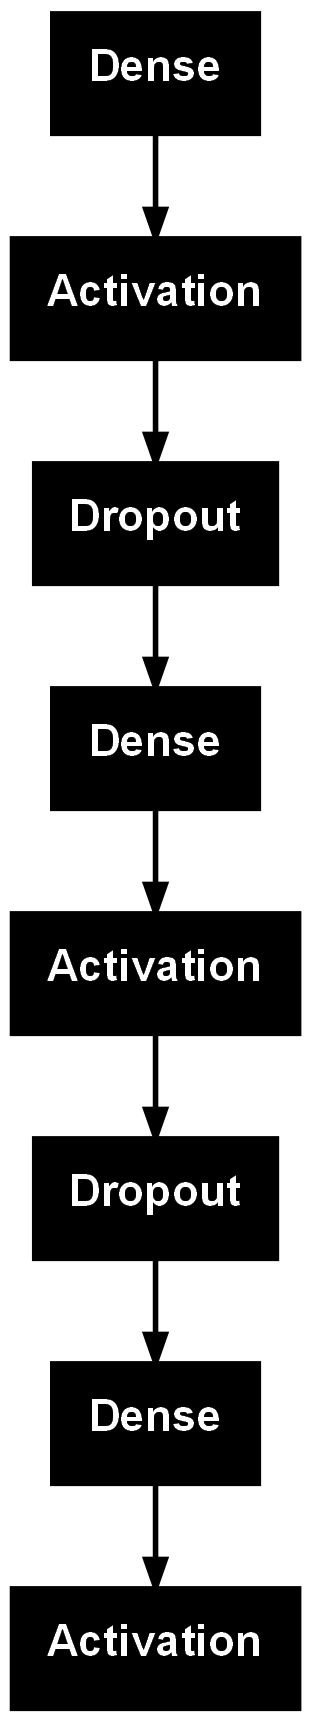

In [23]:
from keras.utils import plot_model
plot_model(model,to_file='mlp_mist.png')

In [25]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=20,batch_size=batch_size)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7633 - loss: 0.7320
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9376 - loss: 0.2088
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9542 - loss: 0.1562
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9601 - loss: 0.1314
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9653 - loss: 0.1114
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9684 - loss: 0.1042
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9714 - loss: 0.0935
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9734 - loss: 0.0877
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9765 - loss: 0.0754
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9752 - loss: 0.0789
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9768 - loss: 0.0731
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step

In [26]:
loss,acc=model.evaluate(xtest,ytest,batch_size=batch_size)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9784 - loss: 0.0741
